<a href="https://colab.research.google.com/github/lazarinastoy/pytrends/blob/main/share_of_search_python_googletrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install the libraries
!pip install pytrends

In [2]:
#import libraries
import pandas as pd                        
from pytrends.request import TrendReq
import numpy as np
import matplotlib.pyplot as plt


#create model
pytrend = TrendReq()



# How to do Competitor Research and calculate Share of Search


In [3]:
#create list of competitors
competitors_list = ["Facebook", "Apple", "Amazon", "Netflix", "Google"]

In [5]:
#get historical interest
historicalinterestdf = pytrend.get_historical_interest(competitors_list, year_start=2020, month_start=10, day_start=1, hour_start=0, year_end=2021, month_end=10, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


In [6]:
#check out your df
historicalinterestdf.head()

,Facebook,Apple,Amazon,Netflix,Google,isPartial
date,,,,,,
2020-10-01 00:00:00,67,12,28,15,84,False
2020-10-01 01:00:00,65,11,27,15,85,False
2020-10-01 02:00:00,64,11,26,14,84,False
2020-10-01 03:00:00,63,10,25,12,84,False
2020-10-01 04:00:00,65,10,24,10,82,False


In [7]:
#looking at rows where all values are not equal to 0
historicalinterestdf[(historicalinterestdf != 0).all(1)]
#drop all rows that have null values in all columns
historicalinterestdf.dropna(how='all',axis=0, inplace=True) 
#drop column isPartial
historicalinterestdf.drop(columns="isPartial", inplace=True)

In [8]:
#calculate totals per column
# select numeric columns and calculate the sums
sum_per_competitor = historicalinterestdf.select_dtypes(pd.np.number).sum().rename('total')
#calculate averages per column 
#select numeric columns and calculate the sums 
averages = historicalinterestdf.select_dtypes(pd.np.number).mean().rename('average per column')

#create function to calculate SoS
sos = 100 * sum_per_competitor/sum(sum_per_competitor)

# append sums, averages and sos to the data frame
historicalinterestdf.append([averages, sum_per_competitor, sos.rename('sos')])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Facebook,Apple,Amazon,Netflix,Google
2020-10-01 00:00:00,67.000000,12.000000,28.000000,15.000000,84.000000
2020-10-01 01:00:00,65.000000,11.000000,27.000000,15.000000,85.000000
2020-10-01 02:00:00,64.000000,11.000000,26.000000,14.000000,84.000000
2020-10-01 03:00:00,63.000000,10.000000,25.000000,12.000000,84.000000
2020-10-01 04:00:00,65.000000,10.000000,24.000000,10.000000,82.000000
...,...,...,...,...,...
2021-08-04 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2021-08-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
average per column,69.329995,11.323623,34.048399,14.196935,80.164618
total,456954.000000,74634.000000,224413.000000,93572.000000,528365.000000


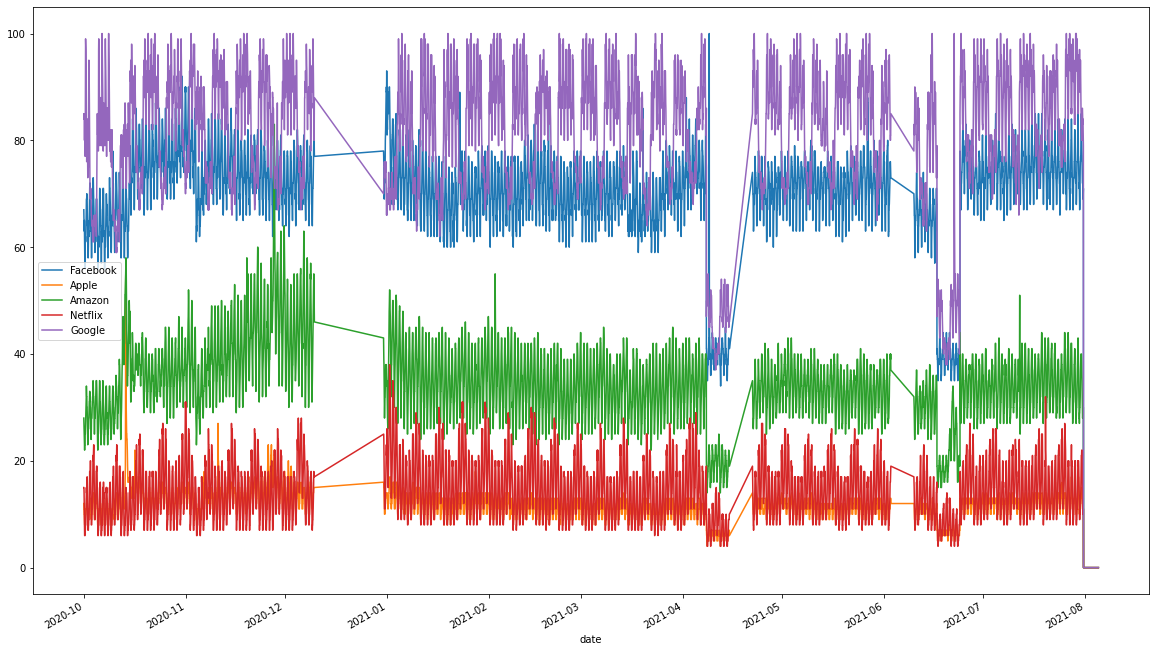

In [9]:
#plot a timeseries chart
historicalinterestdf.plot(figsize=(20, 12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92562d4190>,
      dtype=object)

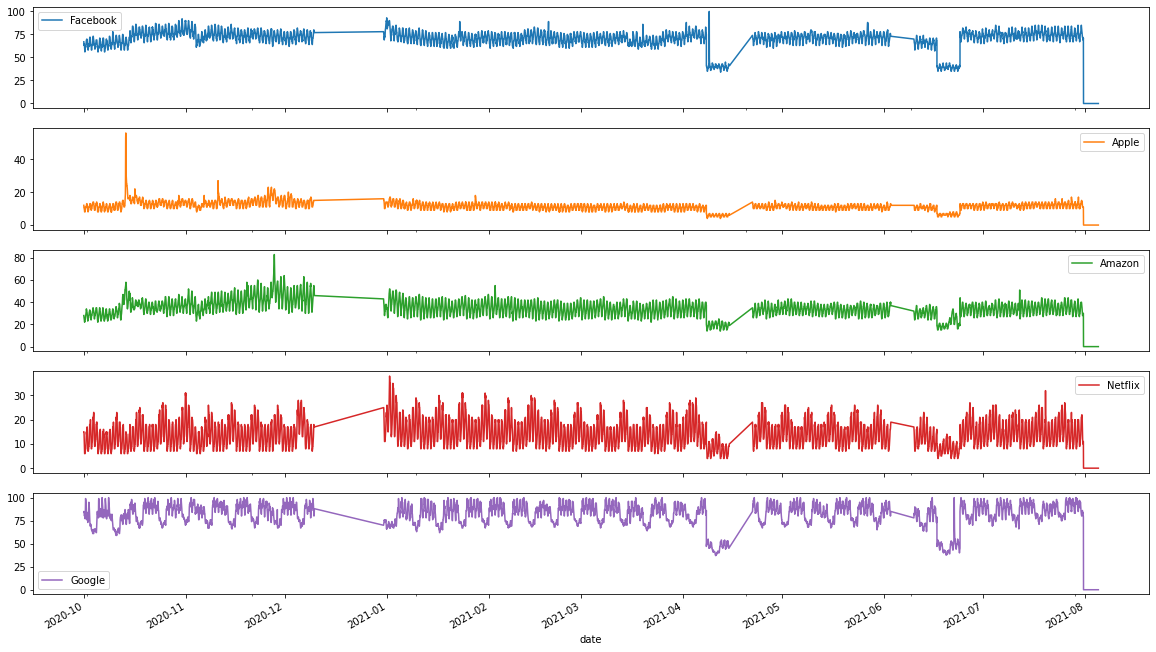

In [10]:
#plot seperate graphs, using the competitor
historicalinterestdf.plot(subplots=True, figsize=(20, 12))

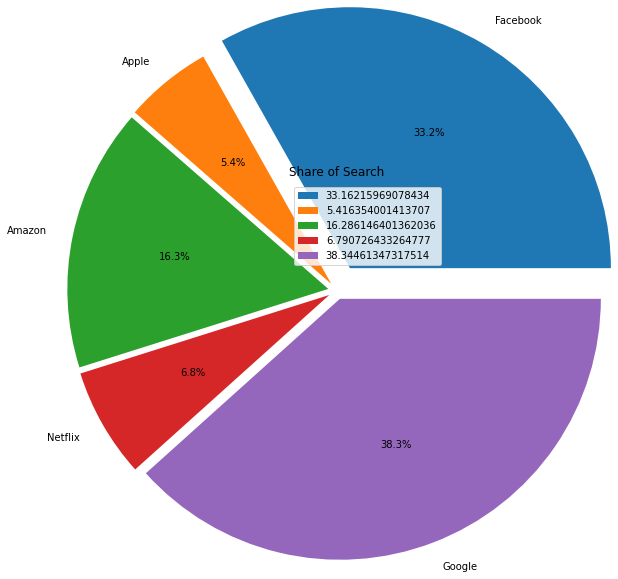

In [11]:
#plot a piechart with the share of search

plt.pie(sos, labels = competitors_list, radius=3, explode=(0.3,0.1,0.1,0.1,0.1), autopct='%1.1f%%')
plt.title("Share of Search")
plt.legend(labels = sos, loc='upper right')

In [12]:
#save as a csv
historicalinterestdf.to_csv('historicaldatabycompetitor.csv')

#download the files from collab
from google.colab import files
files.download("historicaldatabycompetitor.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>